
# ICT706 SouthBank 2020 Semester 1 - Week 6 Lab Exam  (30 Marks)

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

### Instructions
Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv, groceries.csv

When you have finished, this notebook is the only file (ipynb) that you will need to submit to Blackboard, if you having trouble submitting this file try to zip it. 


In [2]:
# Imports needed to complete this exam

import pandas as pd
import matplotlib.pyplot as plt


### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [3]:
#q1 (1)
import pandas as pd
df = pd.read_csv("alumni.csv")

### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [48]:
#a) (1)
df.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [49]:
#b) (1)
df.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [50]:
#c) (1)
df.dtypes

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [51]:
#d) (1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
Year Graduated    88 non-null int64
Gender            88 non-null object
Marital Status    88 non-null object
Diploma Type      88 non-null object
Defaulted         88 non-null object
Salary            88 non-null int64
Fee               88 non-null int64
Savings ($)       88 non-null object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [52]:
#e) (1)
df.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [53]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")
 

66000.0

In [54]:
#a) (2)
Savings = df['Savings ($)'].str.replace("," , "").str.replace("$" , "")
Savings.head()


0     86000
1    116000
2     52000
3     76000
4     52000
Name: Savings ($), dtype: object

b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [55]:
#b) (1)
df.dtypes
#alumni.dtypes.Savings

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [56]:
#a
df["Gender"].value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [57]:
# b) (1)
df['Gender'].str.replace('^M$','Male')

0       Male
1       Male
2     Female
3       Male
4     Female
5     Female
6       Male
7     Female
8       Male
9     Female
10    Female
11    Female
12      Male
13      Male
14    Female
15      Male
16      Male
17    Female
18      Male
19    Female
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28      Male
29      Male
       ...  
58    Female
59      Male
60      Male
61    Female
62      Male
63      Male
64    Female
65      Male
66    Female
67    Female
68      Male
69    Female
70    Female
71      Male
72      Male
73    Female
74      Male
75    Female
76      Male
77    Female
78      Male
79    Female
80    Female
81    Female
82      Male
83      Male
84      Male
85      Male
86    Female
87      Male
Name: Gender, Length: 88, dtype: object

c) That didn't the set alumni["Gender"] column however. You will need to update the column when using the replace command 'alumni["Gender"]=<replace command>', show how this is done below

In [58]:
# c) (1)
#alumni["Gender"]=
df['Gender']=df['Gender'].str.replace('^M$','Male')

In [59]:
df['Gender'].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

d) You can set it directly by using the df.loc command, show how this can be done by using the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'

In [60]:
# d) (1)
df.loc[df.Gender=='M']=('Male')

e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [61]:
# e) (1)
df['Gender'].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [62]:
# a)(1)
df.Salary.median()

75000.0

In [63]:
# b)(1)
df.Salary.mean()

84090.90909090909

In [64]:
# c)(1)
df.Salary.std()

21234.128008173615

d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [65]:
# d) (1)
df[df.Fee > 15000]

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
18,2006,Male,Married,Standard Diploma,No,140000,20960,"$72,000"


### Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

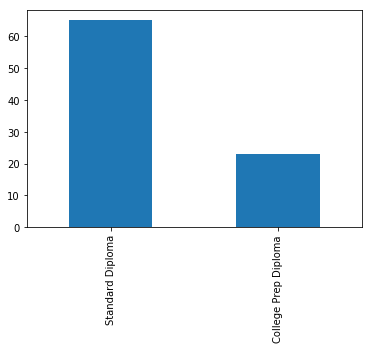

In [66]:
#a) (1)
df['Diploma Type'].value_counts().plot(kind='bar');

In [67]:
df['Diploma Type'].value_counts()

Standard Diploma        65
College Prep Diploma    23
Name: Diploma Type, dtype: int64

b) Now create a box plot comparison between 'Savings' and 'Salary' columns

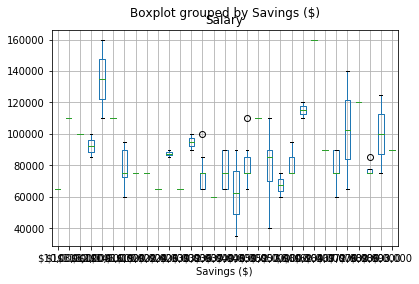

In [68]:
#b) (1)
df.boxplot(column = 'Salary' , by='Savings ($)') 

c) Generate a histogram with the 'Salary' column and use 12 bins.

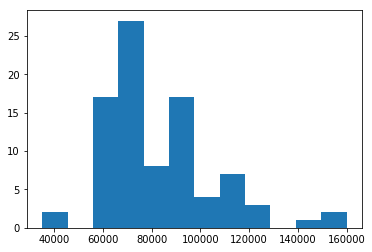

In [69]:
#c) (1)
plt.hist(df['Salary'], bins=12)
plt.show()

d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

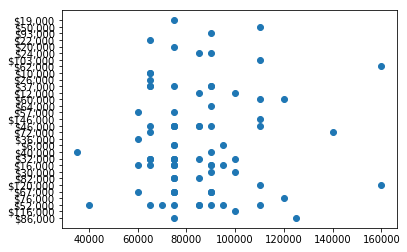

In [5]:
#d) (1)
plt.scatter(df['Salary'], df['Savings ($)'])

### Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [6]:
# Q7 (2)
df = pd.crosstab(df['Marital Status'],df['Defaulted'])
print(df)

Defaulted       No  Yes
Marital Status         
Divorced         8   11
Married         19   16
Single           9   25


### Question 8 :  Association Rules (6 Marks)

Calculate the metrics (support and confidence) for a given association rule. 

Support and Confidence are the key measures to determine association rules in a dataset. 

    • Support is an indication of how frequently a set of items (an itemset) appears in the dataset.  
      It is defined as: support(S) = number of baskets that contain S / total number of baskets.

    • Confidence is an indication of how often a rule has been found to be true.  
      The confidence of a rule S=>T is defined as confidence(S,T) = support(S  T) / support(S).

Functions needed for this question are given for you below:

In [7]:

def support(data, items):
    """Calculates how many times the given set of items appears in the data."""
    count = 0
    for basket in data:
        if items.issubset(basket):
            count += 1
    return count / len(data)

def confidence(data, lhs, rhs):
    """
    Calculates the confidence of the rule: lhs -> rhs.
    Note that lhs and rhs must both be sets.
    """
    return support(data, lhs.union(rhs)) / support(data, lhs)

def clean_groceries():
    """
    Clean the groceries data by removing leading/trailing spaces and making it lowercase, then return the groceries
    """
    input = open("groceries.csv", "r")
    groceries = []
    for line in input:
        words = line.split(",")
        cleaned = [w.strip().lower() for w in words]
        groceries.append(set(cleaned))
    input.close()
    return groceries

def itemset(data):
    """Gets the set of all items in all baskets."""
    result = set()
    for basket in data:
        result = result.union(set(basket))
    return result


a) use the clean_groceries() method to return a list of cleaned groceries and assign it to 'groceries'

In [8]:
#a) (1)
groceries = clean_groceries()

In [9]:
groceries

[{'citrus fruit', 'margarine', 'ready soups', 'semi-finished bread'},
 {'coffee', 'tropical fruit', 'yogurt'},
 {'whole milk'},
 {'cream cheese', 'meat spreads', 'pip fruit', 'yogurt'},
 {'condensed milk',
  'long life bakery product',
  'other vegetables',
  'whole milk'},
 {'abrasive cleaner', 'butter', 'whole milk', 'yogurt'},
 {'rolls/buns'},
 {'bottled beer', 'liquor (appetizer)', 'other vegetables', 'uht-milk'},
 {'pot plants'},
 {'cereals', 'whole milk'},
 {'bottled water',
  'chocolate',
  'other vegetables',
  'tropical fruit',
  'white bread'},
 {'bottled water',
  'butter',
  'citrus fruit',
  'curd',
  'dishes',
  'flour',
  'tropical fruit',
  'whole milk',
  'yogurt'},
 {'beef'},
 {'frankfurter', 'rolls/buns', 'soda'},
 {'chicken', 'tropical fruit'},
 {'butter', 'fruit/vegetable juice', 'newspapers', 'sugar'},
 {'fruit/vegetable juice'},
 {'packaged fruit/vegetables'},
 {'chocolate'},
 {'specialty bar'},
 {'other vegetables'},
 {'butter milk', 'pastry'},
 {'whole milk'},


In [10]:
input = open("groceries.csv", "r")
groceries = []
for line in input:
    words = line.split(",")
    cleaned = [w.strip().lower() for w in words]
    groceries.append(set(cleaned))
input.close()
groceries


[{'citrus fruit', 'margarine', 'ready soups', 'semi-finished bread'},
 {'coffee', 'tropical fruit', 'yogurt'},
 {'whole milk'},
 {'cream cheese', 'meat spreads', 'pip fruit', 'yogurt'},
 {'condensed milk',
  'long life bakery product',
  'other vegetables',
  'whole milk'},
 {'abrasive cleaner', 'butter', 'whole milk', 'yogurt'},
 {'rolls/buns'},
 {'bottled beer', 'liquor (appetizer)', 'other vegetables', 'uht-milk'},
 {'pot plants'},
 {'cereals', 'whole milk'},
 {'bottled water',
  'chocolate',
  'other vegetables',
  'tropical fruit',
  'white bread'},
 {'bottled water',
  'butter',
  'citrus fruit',
  'curd',
  'dishes',
  'flour',
  'tropical fruit',
  'whole milk',
  'yogurt'},
 {'beef'},
 {'frankfurter', 'rolls/buns', 'soda'},
 {'chicken', 'tropical fruit'},
 {'butter', 'fruit/vegetable juice', 'newspapers', 'sugar'},
 {'fruit/vegetable juice'},
 {'packaged fruit/vegetables'},
 {'chocolate'},
 {'specialty bar'},
 {'other vegetables'},
 {'butter milk', 'pastry'},
 {'whole milk'},


b) Uncomment len(groceries) to confirm 9835 items.

In [11]:
#b) (1)
len(groceries)

9835

c) use the itemset() method to return a set of all items in the basket and assign it to 'items', uncomment 'items' to see your item list

In [12]:
#c) (1)
#items
def itemset(data):
    """Gets the set of all items in all baskets."""
    result = set()
    for basket in data:
        result = result.union(set(basket))
    return result
items=itemset(groceries)
items

{'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'frozen potato products',
 'froz

d) Calculate the confidence of the rule: {mustard} => {meat}

In [13]:
#d) (1)
def confidence(data, lhs, rhs):
    """
    Calculates the confidence of the rule: lhs -> rhs.
    Note that lhs and rhs must both be sets.
    """
    return support(data, lhs.union(rhs)) / support(data, lhs)
confidence(groceries, set(['mustard']), set(['meat']))

0.03389830508474576

e) Calculate the confidence of the rule: {whisky} => {meat}

In [14]:
#e) (1)
confidence(groceries,set(['whisky']),set(['meat']) )

0.125

f) Show all items with a support greater than 10% and assign it to above10, uncomment above10 to see results

In [59]:
#f) (1)
#above10
above10 = [i for i in items if support(items, set(i)) > 0.10]
above10


['tea', 'pasta', 'salt', 'rice', 'onions', 'curd', 'oil']